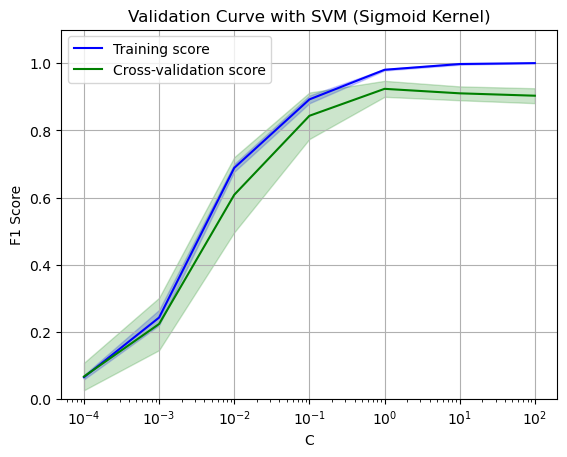

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
fetal_health_df = pd.read_csv('fetal_health.csv')

# Define the numerical columns (all columns except 'fetal_health')
numerical_features = fetal_health_df.columns.difference(['fetal_health']).tolist()

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

# Separate features and target
X = fetal_health_df.drop('fetal_health', axis=1)
y = fetal_health_df['fetal_health']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the pipeline with preprocessing and SVC
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(kernel='poly', degree=3))
])

# Define the range of parameter values to test for C
param_range = np.logspace(-4, 2, 7)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    pipeline, X_train, y_train, param_name="svc__C", param_range=param_range,
    scoring="f1", n_jobs=-1, cv=5
)

# Calculate mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure()
plt.title("Validation Curve with SVM (Sigmoid Kernel)")
plt.xlabel("C")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="b")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.grid(True)
plt.show()


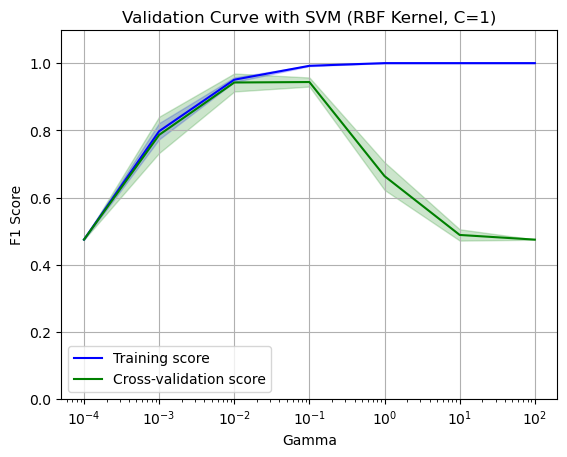

In [35]:
# Define the pipeline with preprocessing and SVC
pipeline = Pipeline([
    ('scaler', preprocessor),
    ('svc', SVC(kernel='rbf', C=1))
])


# Define the range of parameter values to test for gamma
param_range = np.logspace(-4, 2, 7)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    pipeline, X_train, y_train, param_name="svc__gamma", param_range=param_range,
    scoring="f1_macro", n_jobs=-1, cv=5
)

# Calculate mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure()
plt.title("Validation Curve with SVM (RBF Kernel, C=1)")
plt.xlabel("Gamma")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="b")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.grid(True)

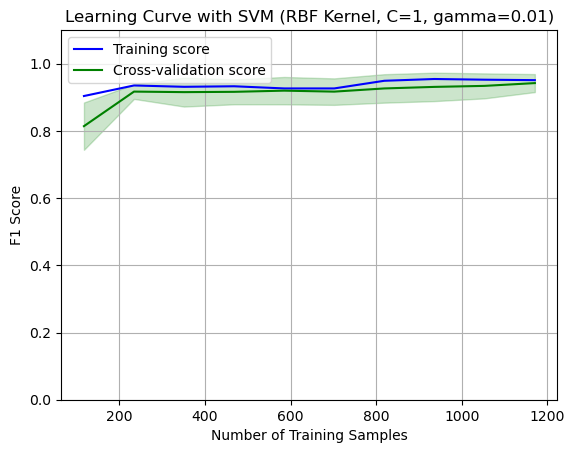

In [41]:
from sklearn.model_selection import learning_curve

# Define the pipeline with preprocessing and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=1, gamma=0.01))
])

# Define the range of training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='f1_macro', n_jobs=-1
)

# Calculate mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve with SVM (RBF Kernel, C=1, gamma=0.01)")
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
plt.plot(train_sizes, train_scores_mean, label="Training score", color="b")

plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.grid(True)
plt.show()

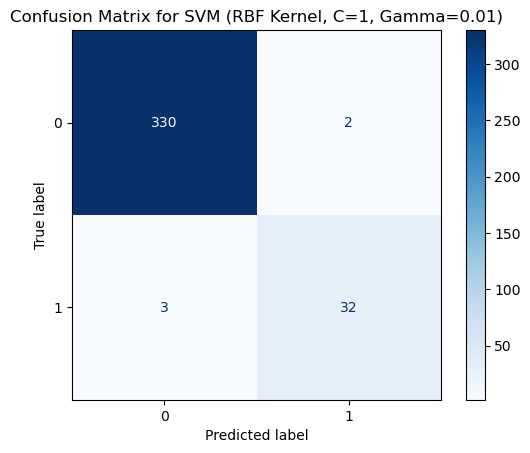

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Define the pipeline with preprocessing and SVC
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(kernel='rbf', C=1, gamma=0.01))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM (RBF Kernel, C=1, Gamma=0.01)')
plt.show()




In [51]:
from sklearn.metrics import f1_score

# Confusion Matrix values
# NN
tn_nn, fp_nn, fn_nn, tp_nn = 71, 11, 7, 95
# KNN
tn_knn, fp_knn, fn_knn, tp_knn = 75, 7, 9, 93
# SVM
tn_svm, fp_svm, fn_svm, tp_svm = 73, 9, 9, 93

# Construct true labels and predictions
y_true_nn = [0]*tn_nn + [1]*fn_nn + [0]*fp_nn + [1]*tp_nn
y_pred_nn = [0]*tn_nn + [0]*fn_nn + [1]*fp_nn + [1]*tp_nn

y_true_knn = [0]*tn_knn + [1]*fn_knn + [0]*fp_knn + [1]*tp_knn
y_pred_knn = [0]*tn_knn + [0]*fn_knn + [1]*fp_knn + [1]*tp_knn

y_true_svm = [0]*tn_svm + [1]*fn_svm + [0]*fp_svm + [1]*tp_svm
y_pred_svm = [0]*tn_svm + [0]*fn_svm + [1]*fp_svm + [1]*tp_svm

# Calculate F1 scores
f1_nn = f1_score(y_true_nn, y_pred_nn)
f1_knn = f1_score(y_true_knn, y_pred_knn)
f1_svm = f1_score(y_true_svm, y_pred_svm)

print(f"F1 Score for NN: {f1_nn}")
print(f"F1 Score for KNN: {f1_knn}")
print(f"F1 Score for SVM: {f1_svm}")


F1 Score for NN: 0.9134615384615385
F1 Score for KNN: 0.9207920792079208
F1 Score for SVM: 0.9117647058823528
